In [2]:
import pandas as pd
import seaborn as sns
import dynamo
import dynamo as dyn
from dynamo.preprocessing import Preprocessor
import pearson_residual_normalization_recipe
from benchmark_utils import *
dyn_adata = dyn.sample_data.zebrafish()
print("original data shape:", dyn_adata.shape)

import numpy as np



|-----> Downloading data to ./data/zebrafish.h5ad


original data shape: (4181, 16940)


## Convert Data for R Seurat inputs

In [3]:
import scipy
import scipy.io
dyn.preprocessing.convert_layers2csr(dyn_adata)
dyn.preprocessing.unique_var_obs_adata(dyn_adata)
scipy.io.mmwrite("counts.mtx", dyn_adata.X)
scipy.io.mmwrite("spliced.mtx", dyn_adata.layers["spliced"])
scipy.io.mmwrite("unspliced.mtx", dyn_adata.layers["unspliced"])

In [4]:
pd.Series(dyn_adata.obs_names).to_csv("./data/cell_names.csv")
pd.Series(dyn_adata.var_names).to_csv("./data/var_names.csv")

In [11]:
seurat_X_pca = pd.read_csv("./R-seurat-test/X_pca.csv")

In [12]:
seurat_X_pca

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
TGCCAAATCACCACCT-1-0,-5.857340,2.867679,0.169394,0.860430,0.185787,0.855904,-0.133440,3.436429,-0.656718,-1.001899,...,0.439428,-0.271046,0.233556,0.842144,0.126444,-0.300330,-0.259993,0.201506,0.691337,-0.898238
AAATGCCAGGAGCGTT-1-0,-5.925883,5.597495,-0.900045,-10.143160,0.501072,-4.512660,0.897890,2.204267,-1.688371,-1.772579,...,-0.089032,-1.277523,-0.383998,0.783514,-0.988206,3.932976,0.766193,-3.019138,-1.428712,0.049915
CAGCGACAGAGAACAG-1-0,-3.579667,2.989932,-0.834230,-0.383201,-0.424362,-0.167832,-1.243602,3.362437,-1.655332,-2.129215,...,-0.088640,-3.174913,0.750548,-1.297783,-0.547427,-0.764031,2.651637,-0.967530,0.000698,1.118219
GGGACCTGTGACCAAG-1-0,5.290537,-1.039920,-0.853655,-1.084340,-0.118731,0.783454,0.078117,0.961921,-3.336205,1.302914,...,-0.011801,-1.567974,-2.097751,-0.073514,0.056674,-0.655252,-1.321971,-0.787410,0.765263,-1.392629
TCCCGATAGTGTGGCA-1-0,-1.567316,3.057268,-0.740447,1.247021,0.657517,-1.049703,2.523350,6.216682,0.798386,-1.664965,...,-1.561239,-1.398491,-0.570233,-1.425783,-0.767291,-1.033563,1.096380,-0.823903,-0.395976,-1.071556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAGACCAAGTCCATAC-1-1,-0.961629,20.183684,-5.654873,-80.966613,4.519564,-48.988919,-1.410357,1.601109,6.500014,5.686255,...,0.938298,0.673494,-3.478579,0.216731,1.192958,5.564480,0.982383,-6.300963,-0.988456,-2.047390
GGTGTTAAGGAATCGC-1-1,-11.527757,-24.679706,21.234401,-2.748895,-29.771123,-2.729607,1.099674,-7.493686,1.626887,6.849523,...,-2.208541,1.969513,-3.309012,4.712587,-0.886932,2.207871,-4.277236,1.705508,0.483338,-1.297374
CTACCCAAGTGACATA-1-1,2.004287,11.668007,-1.086584,-0.805548,-0.058425,-4.246241,-3.470770,-2.679947,4.559864,9.242815,...,0.171213,5.255680,-4.041569,3.546160,0.375497,0.253654,-1.585404,1.058027,-0.168078,-1.157562
TACTCATGTTACGCGC-1-1,2.852642,12.135085,0.552061,4.112850,-1.905906,4.833414,0.422114,-7.674426,0.451828,10.451271,...,-0.718468,1.400250,-2.338385,3.994131,-1.791402,-1.113877,2.798801,2.410403,1.930540,-0.436125


<AxesSubplot:ylabel='Count'>

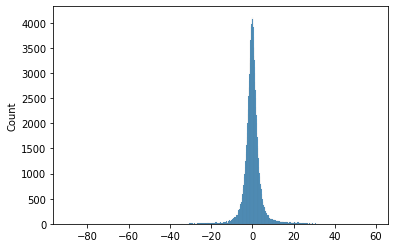

In [13]:
X_pca_arr = seurat_X_pca.to_numpy().flatten()
sns.histplot(X_pca_arr)

In [26]:
print(seurat_X_pca.shape)
print(dyn_adata.shape)

(4181, 50)
(4181, 16940)


In [27]:
dyn_adata.obs_names[:10]

Index(['TGCCAAATCACCACCT-1-0', 'AAATGCCAGGAGCGTT-1-0', 'CAGCGACAGAGAACAG-1-0',
       'GGGACCTGTGACCAAG-1-0', 'TCCCGATAGTGTGGCA-1-0', 'CAGAGAGAGGCGATAC-1-0',
       'AACTGGTAGTGGAGAA-1-0', 'ATTGGACGTCTAGCGC-1-0', 'TGGGCGTCACCAGGTC-1-0',
       'TTGGCAAAGGGCTTCC-1-0'],
      dtype='object', name='index')

In [28]:
seurat_adata = dyn.sample_data.zebrafish()
dyn.preprocessing.unique_var_obs_adata(seurat_adata)
print(seurat_X_pca.shape)
print(seurat_adata.shape)
print(set(seurat_X_pca.index) - set(seurat_adata.obs_names))
print(set(seurat_adata.obs_names) - set(seurat_X_pca.index))

|-----> Downloading data to ./data/zebrafish.h5ad


(4181, 50)
(4181, 16940)
set()
set()


In [42]:

# reorder seurat_X_pca index order and set to X_pca
seurat_adata.obsm["X_pca"] = seurat_X_pca.loc[seurat_adata.obs_names, :].to_numpy()
# print(seurat_adata.obsm)


In [43]:

dyn.tl.reduceDimension(seurat_adata, basis="pca")
dyn.pl.umap(seurat_adata)

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
